In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

Conjunto de validacion sirve para ver que tan bien se dezempeña el modelo fuera del set de entrenamiento, el modelo nunca lo usa para entrenar pero se ocupa durante el entrenamiento para validar ahora el history tambien gaurda desempeño de cada metrica en el conjunto de validacion

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

#bajamos set de datos
diabetes_dataset=load_diabetes()
#vemos su descripcion
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# Save the input and target variables

#ver palabras clave del diccionario  cabecera para ver que contiene
print(diabetes_dataset.keys())

data=diabetes_dataset['data']
targets=diabetes_dataset['target']

#visualizando
print("----------------datos-----------------")
print(data)
print("--------------targets-----------------")
print(targets)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
----------------datos-----------------
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
--------------targets-----------------
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.

In [10]:
# Normalise the target data (this will make clearer training curves)
#restamos promedio y dividimos entre desviacion estandar
targets=(targets-targets.mean(axis=0))/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [12]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets=train_test_split(data,targets,test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [13]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#definiendo fincion que devuelve modelo

def get_model():
  model=Sequential([
      Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(1)

  ])
  return model

#instanciando un modelo
model=get_model()  

In [14]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [18]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
# Train the model, with some of the data reserved for validation
#tomamos porcentanje de datos de entrenamiento como validacion en este caso el 15%
history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64)

#si tenemos conjunto de vaidacion destinado podemos asignarlo como 
#history=model.fit(train_data,train_targets,epochs=100,validation_data=(x_valida,y_valida),batch_size=64)

In [20]:
# Evaluate the model on the test set

model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.7220 - mae: 0.6374 - 26ms/epoch - 13ms/step


[0.7219711542129517, 0.6374067664146423]

#### Plot the learning curves

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

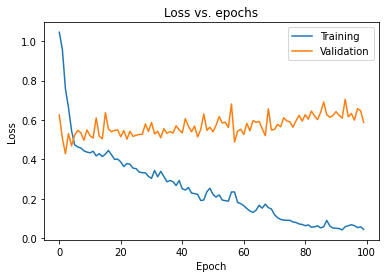

In [22]:
# Plot the training and validation loss
#perdida
plt.plot(history.history['loss'])
#perdida en el conjunto de validacion
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

Son tecnicas que se ocupan para prevenir el sobre ajuste en los modelos, se puede usar regularizacion l1 o l2 conocido como decaida de pesos que consta en agregar una penalizacion a la funcion de costo para evitar que sobre ajuste o el "dropout" que consta en la desactivacion aleatoria de neuronas durante el entrenamiento pero no durante la predicción.

$\displaystyle L(\overline{x})+\lambda\sum \beta_i ^2\text{ L2}$

$\displaystyle L(\overline{x})+\lambda\sum |\beta_i| \text{ L1}$

#### Adding regularisation with weight decay and dropout

In [23]:
#capa que agrega dropout
from tensorflow.keras.layers import Dropout
#importando los regularizadores 
from tensorflow.keras import regularizers

In [24]:
#agregar regularizacion se hace en el modelo y automaticamente se agrega a la funcion de perdida:

#agregando l1
#Dense(128,kernel_regularizer=regularizers.l1(0.001), activation="relu")

#agregando l2
#Dense(128,kernel_regularizer=regularizers.l2(0.001), activation="relu")

#agregando l1 y l2
#Dense(128,kernel_regularizer=regularizers.l1_l2(0.001), activation="relu")

#agregando dropout con probabilidad p de desactivarse conexion de capas, dropout es otra capa que se agrega al modelo
#automaticamente se activa al entrenar y se desactiva al predecir
#Dropout(p)

#funcion que da modelo regularizado
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [25]:
# Re-build the model with weight decay and dropout layers
model=get_regularised_model(1e-5,0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [26]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [27]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.0647 - mae: 0.8751 - val_loss: 0.6681 - val_mae: 0.7074 - 2s/epoch - 390ms/step
Epoch 2/100
6/6 - 0s - loss: 1.0515 - mae: 0.8705 - val_loss: 0.6425 - val_mae: 0.6906 - 80ms/epoch - 13ms/step
Epoch 3/100
6/6 - 0s - loss: 1.0023 - mae: 0.8505 - val_loss: 0.5721 - val_mae: 0.6361 - 88ms/epoch - 15ms/step
Epoch 4/100
6/6 - 0s - loss: 0.8676 - mae: 0.7826 - val_loss: 0.4988 - val_mae: 0.5642 - 85ms/epoch - 14ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7748 - mae: 0.7198 - val_loss: 0.4832 - val_mae: 0.5748 - 75ms/epoch - 12ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6851 - mae: 0.6889 - val_loss: 0.5623 - val_mae: 0.5909 - 115ms/epoch - 19ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6450 - mae: 0.6417 - val_loss: 0.5184 - val_mae: 0.5513 - 89ms/epoch - 15ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5707 - mae: 0.6174 - val_loss: 0.5238 - val_mae: 0.5399 - 79ms/epoch - 13ms/step
Epoch 9/100
6/6 - 0s - loss: 0.6217 - mae: 0.6447 - val_loss: 0.5218 - val_mae: 0.5429 - 88ms/epoch - 15

In [28]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.6184 - mae: 0.5677 - 105ms/epoch - 53ms/step


[0.6184144616127014, 0.5676753520965576]

#### Plot the learning curves

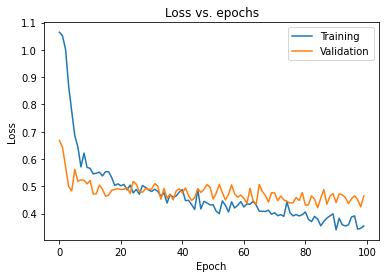

In [29]:
# Plot the training and validation loss

#note como las curvas en el conjunto de validacion se comporta mejor con regularizacion
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

Sirven para dar cierta funcionalidad al entrenamiento, test(evaluacion) y prediccion del modelo de acuerdo a su desempeño durante este mismo, de acuerdo al desempeño de la funcion de perdida y de las metricas medidas durante el entrenamiento, tiene metodos que se pueden ejecutar:

 al inicio del entrenamiento

 al inicio de cada iteracion sobre el lote

 al final de la epoca

 etc

 se agregan a la hora de entrenar el modelo, history es un ejemplo de callback que se llama en cada iteracion y registra las metricas

#### Example training callback

In [37]:
# Write a custom callback

#importamos de keras callback que usaremos para sonbreescribir la clase
from tensorflow.keras.callbacks import Callback

#sobre cargamos la clase para darle la funcionalidad que deseamos( pasamos la clase Callback como argumento)
#así hereda la estructura y metodos

#Callback de entrenamiento
class TrainingCallback(Callback):
  
  #funcion que se ejecuta al inicio del entrenamiento
  def on_train_begin(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print('empieza entrenamiento')

  #funcion que se ejecuta al inicio de la epoca
  def on_epoch_begin(self,epoch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"empieza la epoca {epoch}")

  #funcion que se ejecuta al inicio de la iteracion sobre cada lote
  def on_train_batch_begin(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"comienza entrenamiento en el lote {batch}")


  #funcion que se ejecuta al final de la iteracion sobre cada lote
  def on_train_batch_end(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finaliza entrenamiento en el lote {batch}")


  #funcion que se ejecuta al final de la epoca
  def on_epoch_end(self,epoch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finaliza la epoca {epoch}")

  #funcion que se ejecuta al final del entrenamiento
  def on_train_end(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finalizo el entrenamiento")              

#Callback de test
class TestCallback(Callback):
  
  #funcion que se ejecuta al inicio del entrenamiento
  def on_test_begin(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print('empieza test')


  #funcion que se ejecuta al inicio de la iteracion sobre cada lote
  def on_test_batch_begin(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"comienza test en el lote {batch}")


  #funcion que se ejecuta al final de la iteracion sobre cada lote
  def on_test_batch_end(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finaliza test en el lote {batch}")


  #funcion que se ejecuta al final del entrenamiento
  def on_test_end(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finalizo el test")

#calback de prediccion
class PredictionCallback(Callback):
  
  #funcion que se ejecuta al inicio del entrenamiento
  def on_predict_begin(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print('empieza prediccion')


  #funcion que se ejecuta al inicio de la iteracion sobre cada lote
  def on_predict_batch_begin(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"comienza prediccion en el lote {batch}")


  #funcion que se ejecuta al final de la iteracion sobre cada lote
  def on_predict_batch_end(self,batch,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finaliza prediccion en el lote {batch}")


  #funcion que se ejecuta al final del entrenamiento
  def on_predict_end(self,logs=None):
    #solo imprimiremos algo pero se puede hacer lo que sea
    print(f"finalizo la prediccion")



In [31]:
# Re-build the model
#obtenemos modelo regularizado
model=get_regularised_model(1e-5,0.3)

In [33]:
# Compile the model
model.compile(optimizer='adam',loss='mse')

#### Train the model with the callback

In [34]:
# Train the model, with some of the data reserved for validation

#note que el verbose no manda salida pues se puso False pero el callback imprime lo que definimos
model.fit(train_data,train_targets,epochs=3,batch_size=128,verbose=False,callbacks=[TrainingCallback()])

empieza entrenamiento
empieza la epoca 0
comienza entrenamiento en el lote 0
finaliza entrenamiento en el lote 0
comienza entrenamiento en el lote 1
finaliza entrenamiento en el lote 1
comienza entrenamiento en el lote 2
finaliza entrenamiento en el lote 2
comienza entrenamiento en el lote 3
finaliza entrenamiento en el lote 3
finaliza la epoca 0
empieza la epoca 1
comienza entrenamiento en el lote 0
finaliza entrenamiento en el lote 0
comienza entrenamiento en el lote 1
finaliza entrenamiento en el lote 1
comienza entrenamiento en el lote 2
finaliza entrenamiento en el lote 2
comienza entrenamiento en el lote 3
finaliza entrenamiento en el lote 3
finaliza la epoca 1
empieza la epoca 2
comienza entrenamiento en el lote 0
finaliza entrenamiento en el lote 0
comienza entrenamiento en el lote 1
finaliza entrenamiento en el lote 1
comienza entrenamiento en el lote 2
finaliza entrenamiento en el lote 2
comienza entrenamiento en el lote 3
finaliza entrenamiento en el lote 3
finaliza la epoca

In [36]:
# Evaluate the model
#evaluanbdo con callback de entrenamiento

model.evaluate(test_data,test_targets,verbose=False,callbacks=[TestCallback()])


empieza test
comienza test en el lote 0
finaliza test en el lote 0
comienza test en el lote 1
finaliza test en el lote 1
finalizo el test


0.9758965373039246

In [38]:
# Make predictions with the model
model.predict(test_data,verbose=False,callbacks=[PredictionCallback()])

empieza prediccion
comienza prediccion en el lote 0
finaliza prediccion en el lote 0
comienza prediccion en el lote 1
finaliza prediccion en el lote 1
finalizo la prediccion


array([[-0.01075752],
       [-0.04985408],
       [-0.10133607],
       [-0.05510217],
       [-0.05833812],
       [-0.11395031],
       [-0.03783433],
       [-0.04979789],
       [-0.12958126],
       [-0.09767538],
       [-0.13220651],
       [-0.07666146],
       [-0.04385507],
       [-0.03889723],
       [-0.08003017],
       [-0.05589852],
       [-0.04498643],
       [-0.03772731],
       [-0.03187882],
       [-0.02763584],
       [-0.03256601],
       [-0.11549018],
       [-0.08397663],
       [-0.03691632],
       [-0.08402083],
       [-0.03797193],
       [-0.09462085],
       [-0.03419841],
       [-0.12326195],
       [-0.10358194],
       [-0.12976   ],
       [-0.09624372],
       [-0.01958506],
       [-0.0188796 ],
       [-0.05048439],
       [-0.01931782],
       [-0.10559785],
       [-0.12429866],
       [-0.09495418],
       [-0.1306786 ],
       [-0.03887771],
       [-0.07978716],
       [-0.04822635],
       [-0.12210131],
       [-0.0216683 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

Es un tipo de callback especial para generar regularizacion en los modelos early stopping monitorea el rendimiento del modelo en cada epoca apoyandose en el conjunto de validacion y vijilando una metrica dada en este mismo, a la hora del entrenamiento, y termina el entrenamiento de aceurdo al desempeño en el conjunto de entrenamiento mientra mejore la metrica continua entrenando cuando disminuye la mejora de la metrica entonces para el entrenamiento.

Como el mejoramiento y desmejoramiento no es continuo ie puede mejorar durante 2 epocas luego desmojorar 3 y volver a mejorar patience es un argumento de early sttoping que ayuda a dar un rango de epocas para ver si el desempeño mejora por ejemplo si patience=3 el rendimiento desmejora y calcula otras 3 epocas para ver si mejora si no es asi detiene el entrenamiento.

Otro parametro es min_delta que define el incremento minimo que early sttoping considera como una mejora en la metrica monitoreada.

También tiene el argumento mode que puede ser 'max', 'min' que indica si se esta buscando maximizar o minimizar la metrica.

#### Re-train the models with early stopping

In [39]:
# Re-train the unregularised model
unregularised_model=get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [48]:
unregularised_model.compile(optimizer='adam',loss='mse')
unreg_history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

In [49]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.9983 - 123ms/epoch - 61ms/step


0.9983423948287964

In [50]:
# Re-train the regularised model
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mse')
reg_history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])


In [51]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.9972 - 212ms/epoch - 106ms/step


0.997225284576416

#### Plot the learning curves

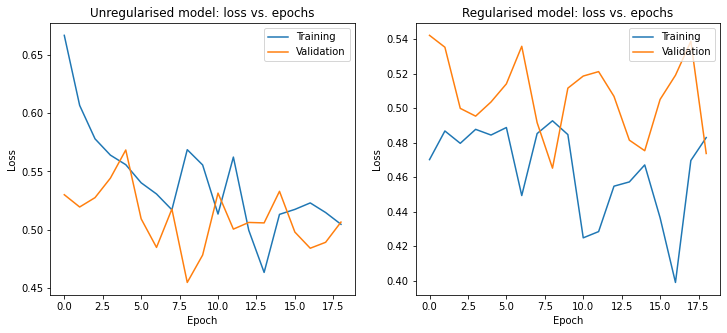

In [52]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()